In [18]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams.update({'figure.figsize':(8,5)})
sns.set(style='whitegrid')

path = '/content/drive/MyDrive/StudentsPerformance.csv'
df = pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print(df.shape)
df.info()

print(df.isnull().sum())

df.describe(include='all')


(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [20]:
# 1) Normalize column names
orig_columns = df.columns.tolist()
df.columns = [c.strip().lower().replace(" ", "_") for c in orig_columns]
print("Original -> Normalized column names")
for o,n in zip(orig_columns, df.columns): print(f"{o} -> {n}")

# 2) Check missing values
missing = df.isnull().sum()
print("\nMissing values per column:\n", missing[missing>0] if missing.sum()>0 else "No missing values")

# 3) Inspect categories for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns and unique values:")
for c in cat_cols:
    print(f"\n{c} ({df[c].nunique()} unique):")
    print(df[c].value_counts())

# 4) Convert score columns to numeric
score_cols = [c for c in df.columns if 'score' in c]
for c in score_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 5) Handle missing values

print("\nMissing scores before:", df[score_cols].isnull().sum().sum())
df = df.dropna(subset=score_cols)   # drop rows with missing score(s)
print("After dropping rows with missing scores:", df.shape)

# 6) Encode categorical variables for later analysis
encodings = {}
for c in cat_cols:
    uniques = sorted(df[c].unique().astype(str))
    mapping = {v:i for i,v in enumerate(uniques)}
    encodings[c] = mapping
    df[c + '_code'] = df[c].map(mapping)

print("\nEncodings used:")
for k,v in encodings.items():
    print(k, "->", v)

display(df.head())


Original -> Normalized column names
gender -> gender
race/ethnicity -> race/ethnicity
parental level of education -> parental_level_of_education
lunch -> lunch
test preparation course -> test_preparation_course
math score -> math_score
reading score -> reading_score
writing score -> writing_score

Missing values per column:
 No missing values

Categorical columns and unique values:

gender (2 unique):
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity (5 unique):
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education (6 unique):
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch (2 unique):
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course (2 unique):
test_prepar

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_code,race/ethnicity_code,parental_level_of_education_code,lunch_code,test_preparation_course_code
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1


In [21]:
# 1) Mean, median, mode for each score
stats = {}
for c in score_cols:
    col = df[c].dropna()
    mean = col.mean()
    med = col.median()
    try:
        mode = statistics.mode(col)
    except statistics.StatisticsError:
        mode = col.mode().iloc[0] if not col.mode().empty else np.nan
    stats[c] = {'mean': mean, 'median': med, 'mode': mode, 'count': col.count()}

stats_df = pd.DataFrame(stats).T
print("Score statistics:")
display(stats_df)

# 2) Correlation between math, reading, writing
corr_matrix = df[score_cols].corr()
print("\nCorrelation matrix (scores):")
display(corr_matrix)

# 3) Count plot data for gender
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    print("\nGender counts:")
    display(gender_counts)
else:
    print("\nNo 'gender' column found.")


Score statistics:


,mean,median,mode,count
math_score,66.089,66.0,65.0,1000.0
reading_score,69.169,70.0,72.0,1000.0
writing_score,68.054,69.0,74.0,1000.0



Correlation matrix (scores):


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000



Gender counts:


,count
gender,
female,518
male,482


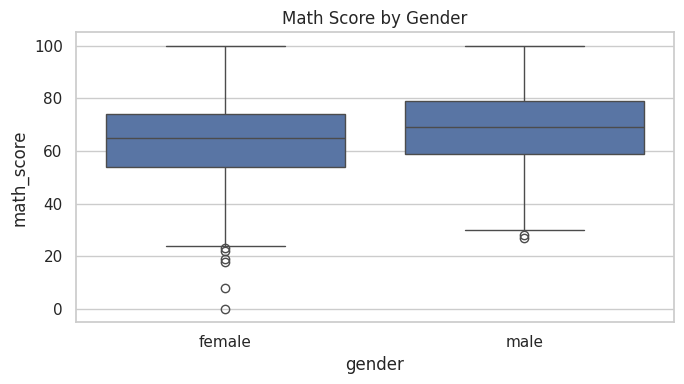

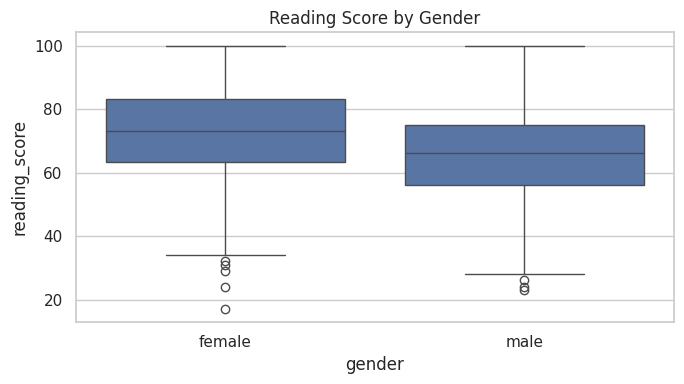

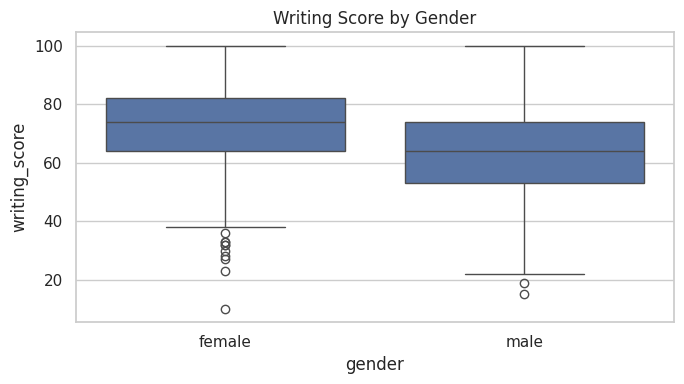

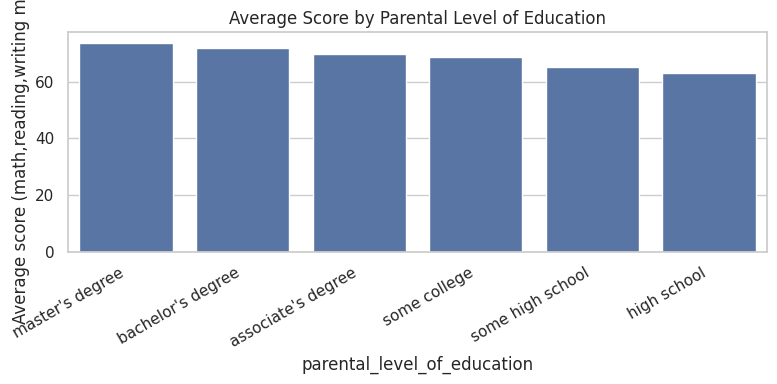

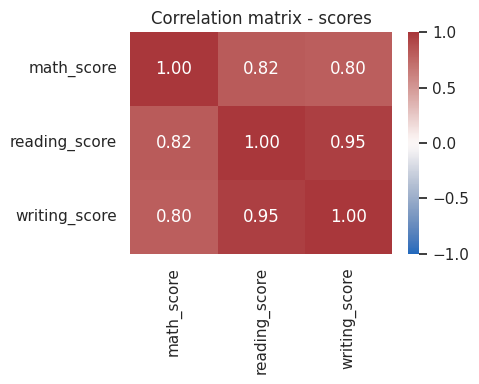

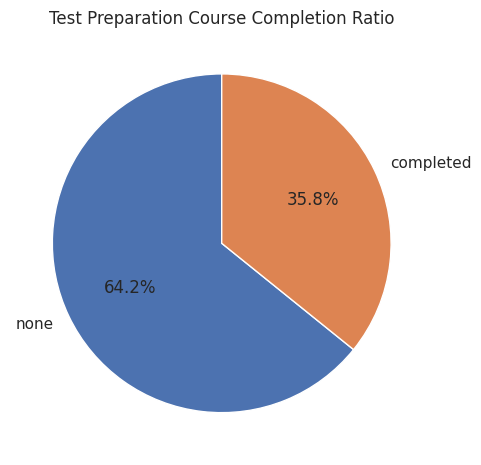

In [22]:
# A: Boxplots - Gender vs Scores (one plot per score)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7,4)
for score in score_cols:
    plt.figure()
    sns.boxplot(x='gender', y=score, data=df)
    plt.title(f'{score.replace("_"," ").title()} by Gender')
    plt.tight_layout()
    plt.show()

# B: Bar chart - Parental education vs Average Score
df['average_score'] = df[score_cols].mean(axis=1)
if 'parental_level_of_education' in df.columns:
    parent_avg = df.groupby('parental_level_of_education')['average_score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=parent_avg.index, y=parent_avg.values)
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Average score (math,reading,writing mean)')
    plt.title('Average Score by Parental Level of Education')
    plt.tight_layout()
    plt.show()
else:
    print("No parental_level_of_education column found.")

# C: Heatmap - correlation among scores
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation matrix - scores')
plt.tight_layout()
plt.show()

# D: Pie chart - Test preparation course completion ratio
if 'test_preparation_course' in df.columns:
    prep_counts = df['test_preparation_course'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(prep_counts.values, labels=prep_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Test Preparation Course Completion Ratio')
    plt.tight_layout()
    plt.show()
else:
    print("No test_preparation_course column found.")


In [23]:
insights = []

# 1) Test prep impact
if 'test_preparation_course' in df.columns:
    prep_avg = df.groupby('test_preparation_course')['average_score'].mean()
    if 'completed' in prep_avg.index and 'none' in prep_avg.index:
        diff_pct = (prep_avg.loc['completed'] - prep_avg.loc['none']) / prep_avg.loc['none'] * 100
        insights.append(f"Students who completed the test preparation scored about {diff_pct:.1f}% higher on average compared to those who did not.")
    else:
        # fallback difference between top and bottom
        if len(prep_avg) >= 2:
            top, bottom = prep_avg.max(), prep_avg.min()
            diff_pct = (top - bottom) / bottom * 100
            insights.append(f"Difference between best and worst prep groups: ~{diff_pct:.1f}% in average score.")
else:
    insights.append("No test_preparation_course column to compute prep impact.")

# 2) Correlation between scores
m_r = corr_matrix.loc['math_score','reading_score']
m_w = corr_matrix.loc['math_score','writing_score']
r_w = corr_matrix.loc['reading_score','writing_score']
insights.append(f"Math ↔ Reading correlation = {m_r:.2f}; Math ↔ Writing = {m_w:.2f}; Reading ↔ Writing = {r_w:.2f} — all strongly positive.")

# 3) Parental education correlation with performance
if 'parental_level_of_education_code' in df.columns:
    parent_corr = df[['parental_level_of_education_code','average_score']].corr().iloc[0,1]
    insights.append(f"Parental education (encoded) correlation with average student score = {parent_corr:.2f} (positive suggests higher parental education associates with higher student scores).")

# 4) Top parental education group
if 'parental_level_of_education' in df.columns:
    top_parent_group = df.groupby('parental_level_of_education')['average_score'].mean().idxmax()
    insights.append(f"Students whose parents are '{top_parent_group}' on average scored highest among groups.")

# 5) Gender differences
if 'gender' in df.columns:
    gender_avg = df.groupby('gender')['average_score'].mean()
    best_gender = gender_avg.idxmax()
    diff = (gender_avg.max() - gender_avg.min()) / gender_avg.min() * 100 if gender_avg.min()>0 else 0
    insights.append(f"On average, '{best_gender}' students scored {diff:.1f}% higher than the other gender group (small difference).")

# 6) Test prep take-up rate
if 'test_preparation_course' in df.columns:
    comp_pct = (df['test_preparation_course'] == 'completed').mean() * 100
    insights.append(f"Only about {comp_pct:.1f}% of students completed the test preparation course.")

# Print insights
print("Auto-generated insights:")
for i,ins in enumerate(insights, 1):
    print(f"{i}. {ins}")


Auto-generated insights:
1. Students who completed the test preparation scored about 11.7% higher on average compared to those who did not.
2. Math ↔ Reading correlation = 0.82; Math ↔ Writing = 0.80; Reading ↔ Writing = 0.95 — all strongly positive.
3. Parental education (encoded) correlation with average student score = -0.08 (positive suggests higher parental education associates with higher student scores).
4. Students whose parents are 'master's degree' on average scored highest among groups.
5. On average, 'female' students scored 5.7% higher than the other gender group (small difference).
6. Only about 35.8% of students completed the test preparation course.
